In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['MedHouseVal'] = housing.target

In [27]:
housing.data.shape

(20640, 8)

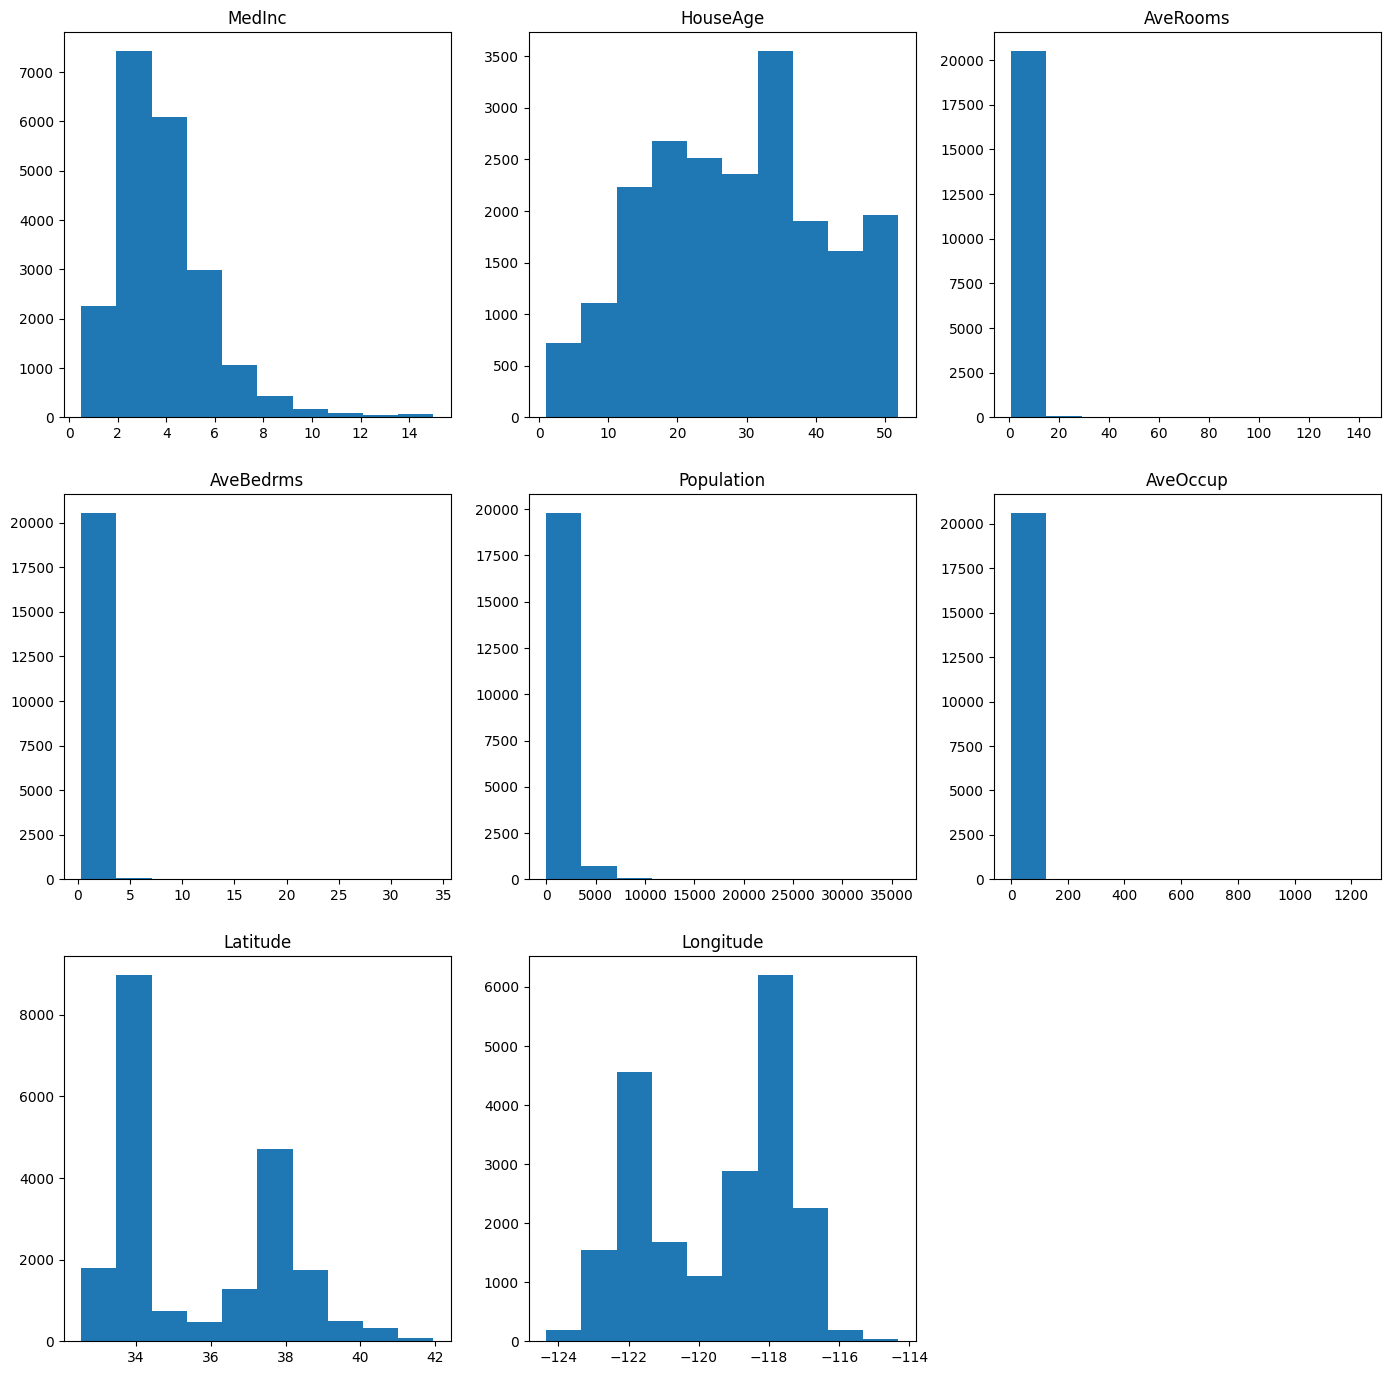

In [28]:
names = ['MedInc', 'HouseAge', 'AveRooms','AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
fig = plt.figure(figsize=(17,17))
for i in range(housing.data.shape[1]):
    plt.subplot(3,3,i+1)
    plt.hist(housing.data[:,i])
    plt.gca().set_title(names[i])
plt.show()

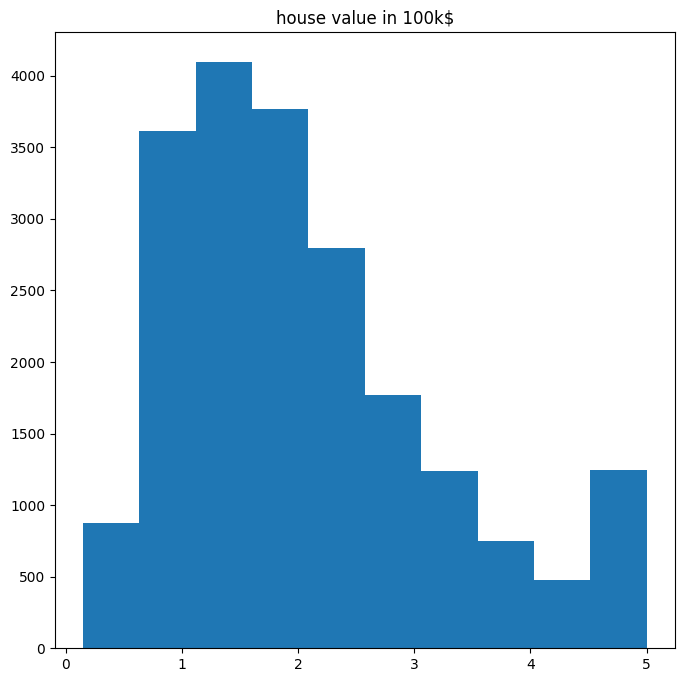

In [29]:
fig = plt.figure(figsize=(8,8))
plt.hist(housing.target);
plt.title('house value in 100k$');

In [35]:
stdscal=StandardScaler()
housing_scaled=stdscal.fit_transform(housing_df)

housing_scale_df=pd.DataFrame(data=housing_scaled,columns=housing_df.columns)

In [61]:
y=housing_scale_df['MedHouseVal']
X=housing_scale_df.drop(['MedHouseVal','Latitude','Longitude'],axis=1)

In [62]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616
...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225


In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [83]:
model=keras.Sequential(
    [
        layers.Dense(6, activation="relu", name="Input_Layer"),
        layers.Dense(50, activation="relu", name="Hidden_Layer-1"),
        layers.Dense(25,activation="relu",name='Hidden_Layer-2'),
        layers.Dense(1,name='Output_Layer')
    ]
)

In [84]:
model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['root_mean_squared_error']
)

In [85]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
tensorboard_callback = TensorBoard(log_dir='homereg_logs')  # Specify log directory
checkpoint_dir = 'checkpoints'
checkpoint_callback = ModelCheckpoint(filepath=os.path.join(checkpoint_dir, 'best_model.{epoch:02d}.keras'), save_best_only=True)
history=model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=128,
        validation_split=0.2,
        callbacks=[tensorboard_callback, checkpoint_callback]
    )

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.9798 - root_mean_squared_error: 0.9895 - val_loss: 0.6632 - val_root_mean_squared_error: 0.8144
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6232 - root_mean_squared_error: 0.7889 - val_loss: 0.4094 - val_root_mean_squared_error: 0.6398
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4343 - root_mean_squared_error: 0.6589 - val_loss: 0.3675 - val_root_mean_squared_error: 0.6062
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3860 - root_mean_squared_error: 0.6212 - val_loss: 0.3443 - val_root_mean_squared_error: 0.5868
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3588 - root_mean_squared_error: 0.5989 - val_loss: 0.3330 - val_root_mean_squared_error: 0.5771
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3648 - root_mean_squared_error: 0.6039 - val_loss: 0.3256 - val_root_mean_squared_error: 0.5706
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss:

In [86]:
y_preds=model.predict(X_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
%load_ext tensorboard
%tensorboard --logdir homereg_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12532), started 0:20:35 ago. (Use '!kill 12532' to kill it.)

In [88]:
loss, mse = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Mean Squared Error:", mse)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2280 - root_mean_squared_error: 0.4769
Test Loss: 0.2224312722682953
Test Mean Squared Error: 0.4716261923313141
